
# DA320 Assignment 4: Jupyter Charts
Jon Kaimmer  
DA320  
Winter2022


 ### Introduction
Explain what data you are using and what chart you will create.

For my Python code - I will need to read data in from my SQL server.


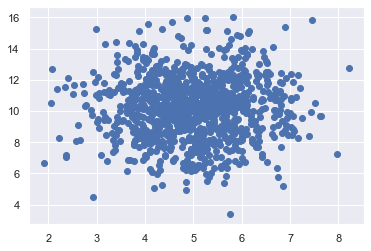

In [24]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


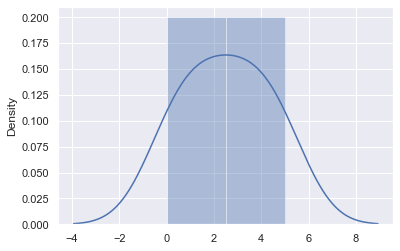

In [25]:
#TESTING SEABORN
sns.distplot([0, 1, 2, 3, 4, 5])

plt.show()

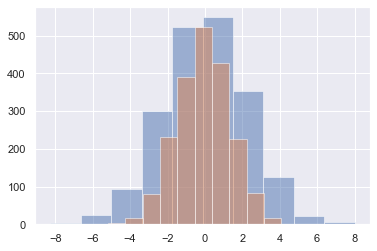

In [42]:
#Testing Pandas
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
#print(data)

for col in 'xy':
    plt.hist(data[col], alpha=0.5)

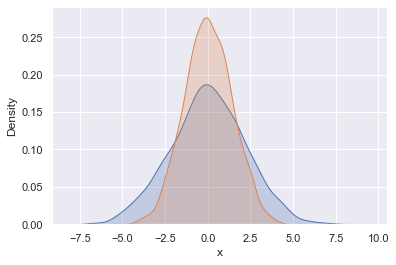

In [34]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\jonat\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

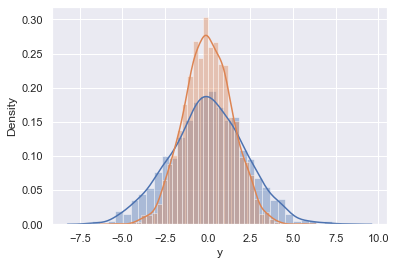

In [36]:
sns.distplot(data['x'])
sns.distplot(data['y'])

 ### Multiple Charts
Each one containing a markdown section that explains the chart followed by the chart itself. 

 ### Conclusion
What did I learn?